In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [11]:
X_cat = pd.read_csv('../data/cleaned_categorical_features(1).csv')
X_num = pd.read_csv('../data/cleaned_numerical_features(1).csv')
y = pd.read_csv("../data/secondary_mushroom_targets(1).csv")
X_cat.shape, X_num.shape, y.shape

((60903, 10), (60903, 3), (60903, 1))

# Univariate  Analysis 

### Numrical Features
- Distribution
- Outliers
- Skewness
- Kurtosis
- Central Tendency (Mean, Median, Mode)
- Spread (Range, Variance, Standard Deviation, IQR)
- Visualizations (Histogram, Box Plot, Violin Plot)

In [12]:
X_num.head()

,cap-diameter,stem-height,stem-width
0,15.26,16.95,17.09
1,16.60,17.99,18.19
2,14.07,17.80,17.74
3,14.17,15.77,15.98
4,14.64,16.53,17.20


In [14]:
X_num.describe()

,cap-diameter,stem-height,stem-width
count,60903.000000,60903.000000,60903.000000
mean,6.742762,6.599368,12.182483
std,5.269106,3.357180,10.029579
min,0.380000,0.000000,0.000000
25%,3.490000,4.650000,5.250000
50%,5.880000,5.960000,10.220000
75%,8.550000,7.750000,16.590000
max,62.340000,33.920000,103.910000


In [24]:
# checking for missing values
X_num.isnull().sum()

cap-diameter    0
stem-height     0
stem-width      0
dtype: int64

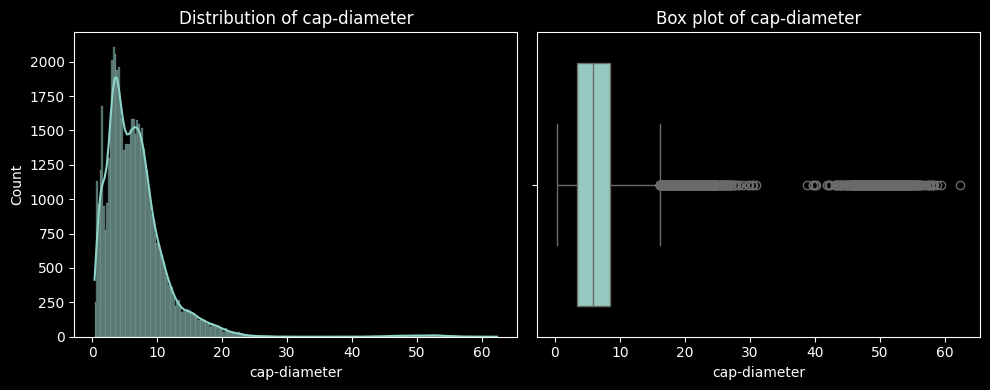

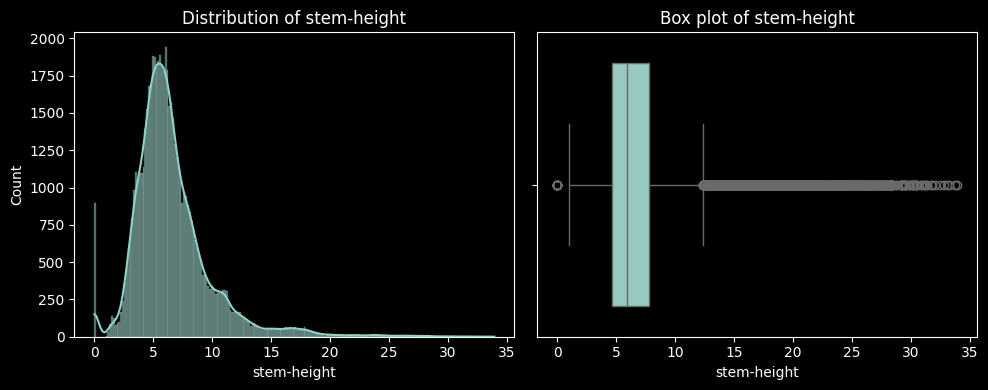

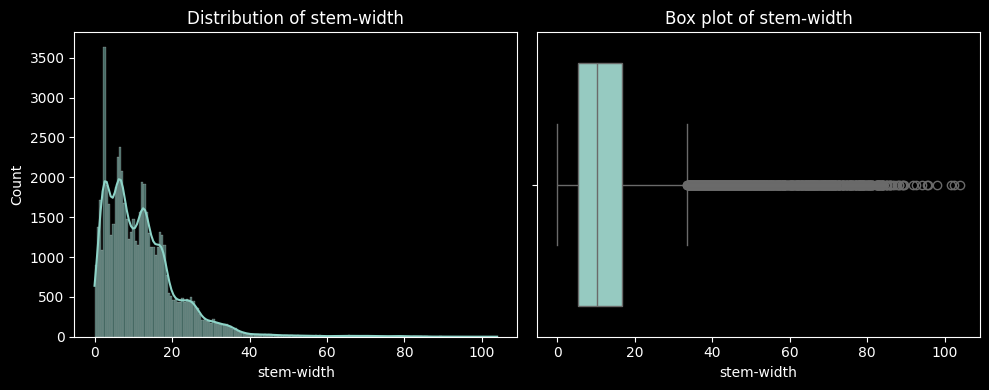

In [15]:
# check the distribution of numerical features
for column in X_num.columns:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(X_num[column], kde=True)
    plt.title(f'Distribution of {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=X_num[column])
    plt.title(f'Box plot of {column}')
    
    plt.tight_layout()
    plt.show()

In [17]:
N = len(X_num)
# checking outliers using IQR method
for column in X_num.columns:
    Q1 = X_num[column].quantile(0.25)
    Q3 = X_num[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = X_num[(X_num[column] < lower_bound) | (X_num[column] > upper_bound)]
    print(f'Number of outliers in {column}: {outliers.shape[0]}')
    print(f'Percentage of outliers in {column}: {outliers.shape[0] / N * 100:.2f}%')


Number of outliers in cap-diameter: 2389
Percentage of outliers in cap-diameter: 3.92%
Number of outliers in stem-height: 4064
Percentage of outliers in stem-height: 6.67%
Number of outliers in stem-width: 1969
Percentage of outliers in stem-width: 3.23%


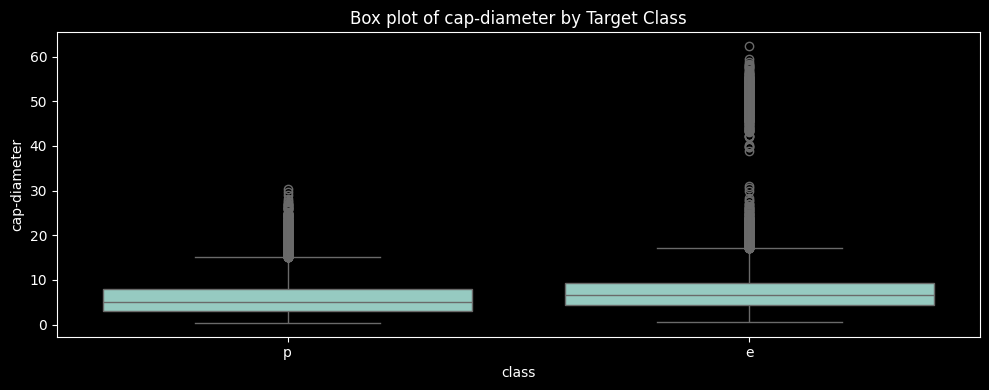

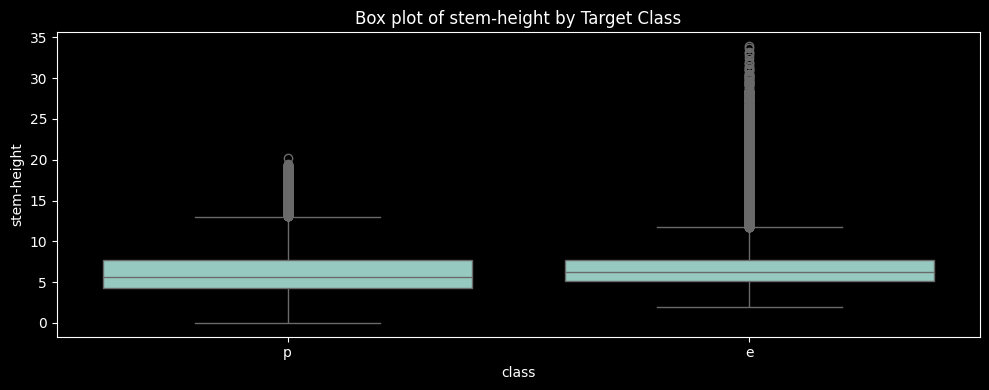

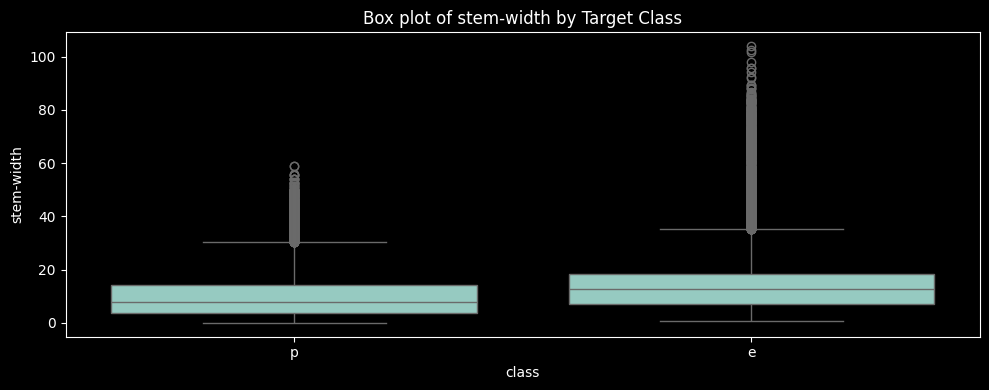

In [18]:
# Univariate  Analysis target vs numerical features
for column in X_num.columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=y['class'], y=X_num[column])
    plt.title(f'Box plot of {column} by Target Class')
    plt.tight_layout()
    plt.show()

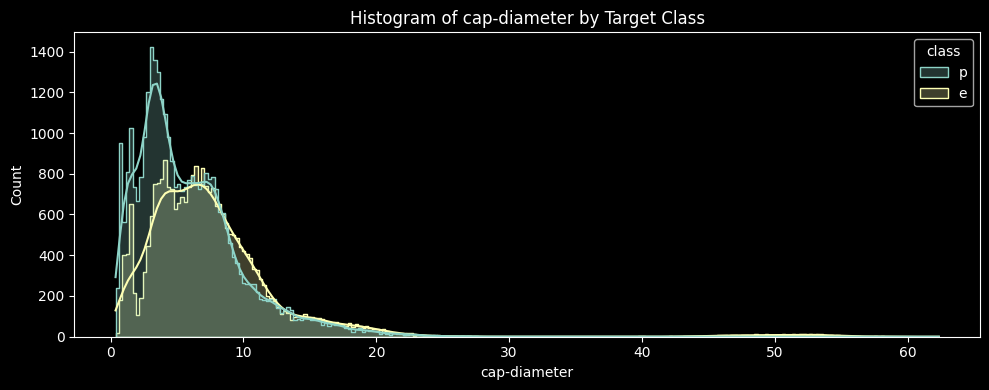

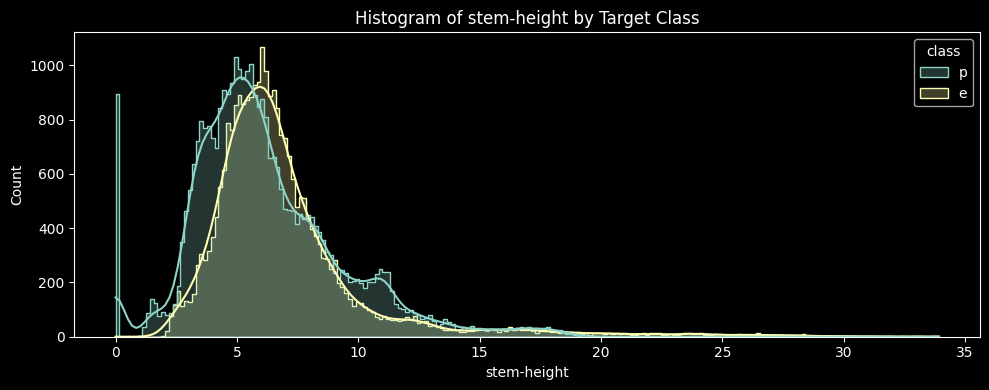

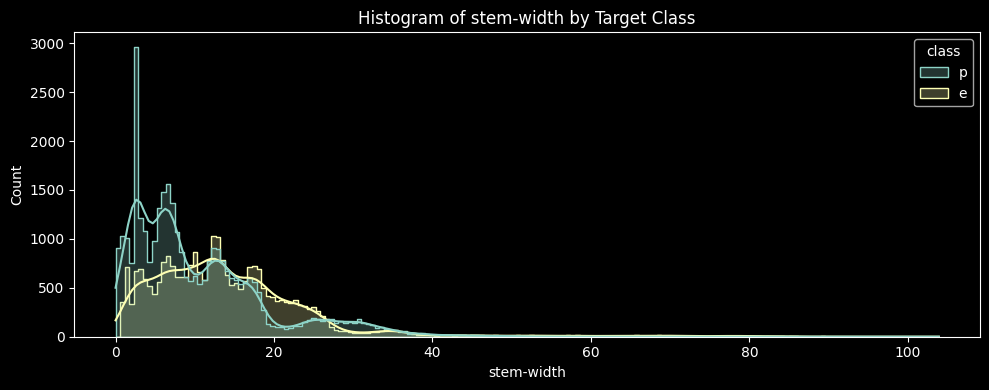

In [19]:
# histogram with target and numerical features
for column in X_num.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=X_num, x=column, hue=y['class'], kde=True, element="step")
    plt.title(f'Histogram of {column} by Target Class')
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Distribution of Target Variable')

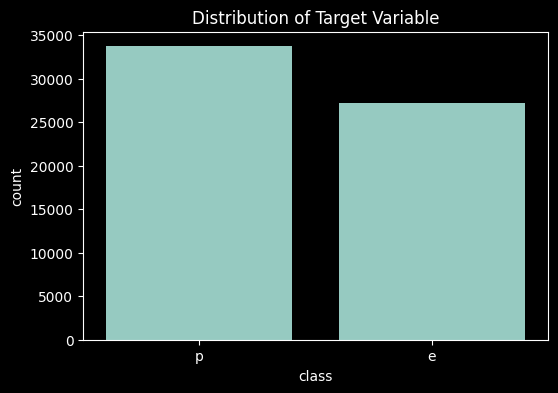

In [20]:
# histogram for target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y['class'])
plt.title('Distribution of Target Variable')

<Figure size 600x600 with 0 Axes>

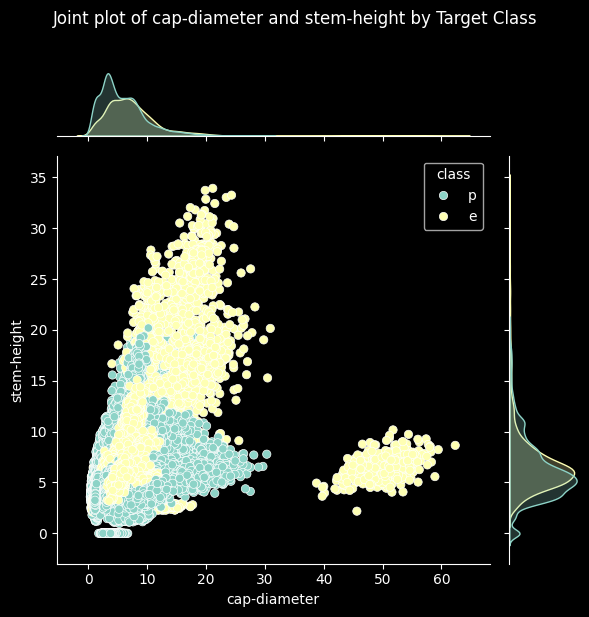

<Figure size 600x600 with 0 Axes>

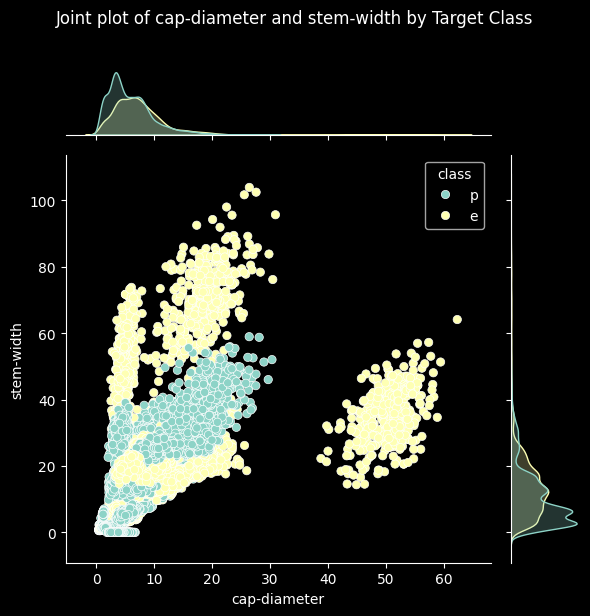

<Figure size 600x600 with 0 Axes>

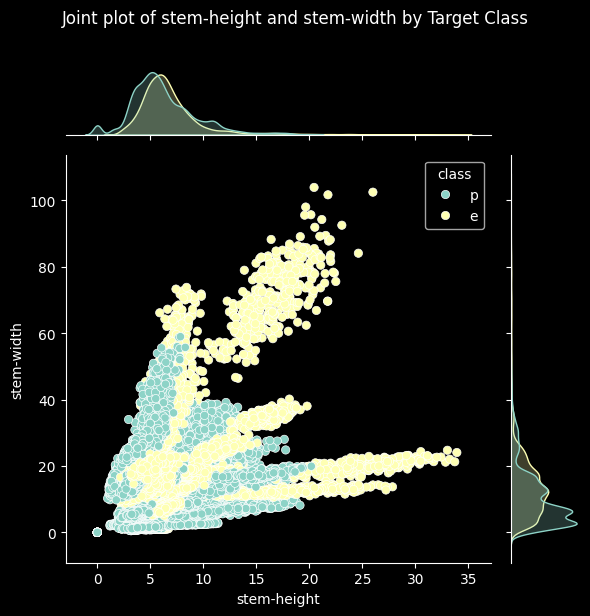

In [29]:
# jointplot for numerical features
for i in range(len(X_num.columns)):
    for j in range(i+1, len(X_num.columns)):
        plt.figure(figsize=(6, 6))
        sns.jointplot(x=X_num.columns[i], y=X_num.columns[j], data=X_num, hue=y['class'], kind='scatter')
        plt.suptitle(f'Joint plot of {X_num.columns[i]} and {X_num.columns[j]} by Target Class', y=1.02)
        plt.tight_layout()
        plt.show()

### Categorical Features
- Frequency Distribution    
- Mode
- Visualizations (Bar Plot, Pie Chart)

In [25]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60903 entries, 0 to 60902
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cap-shape             60903 non-null  object
 1   cap-color             60903 non-null  object
 2   does-bruise-or-bleed  60903 non-null  object
 3   gill-attachment       51068 non-null  object
 4   gill-color            60903 non-null  object
 5   stem-color            60903 non-null  object
 6   has-ring              60903 non-null  object
 7   ring-type             58432 non-null  object
 8   habitat               60903 non-null  object
 9   season                60903 non-null  object
dtypes: object(10)
memory usage: 4.6+ MB


In [26]:
X_cat['ring-type'].value_counts()

ring-type
f    48195
e     2435
z     2118
l     1427
r     1399
p     1265
g     1240
m      353
Name: count, dtype: int64

In [27]:
X_cat['gill-attachment'].value_counts()

gill-attachment
a    12697
d    10247
x     7413
p     6001
e     5648
s     5648
f     3414
Name: count, dtype: int64

In [28]:
# filling missing values with mode
for column in ['gill-attachment','ring-type']:
    mode = X_cat[column].mode()[0]
    X_cat[column].fillna(mode, inplace=True)
X_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60903 entries, 0 to 60902
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cap-shape             60903 non-null  object
 1   cap-color             60903 non-null  object
 2   does-bruise-or-bleed  60903 non-null  object
 3   gill-attachment       60903 non-null  object
 4   gill-color            60903 non-null  object
 5   stem-color            60903 non-null  object
 6   has-ring              60903 non-null  object
 7   ring-type             60903 non-null  object
 8   habitat               60903 non-null  object
 9   season                60903 non-null  object
dtypes: object(10)
memory usage: 4.6+ MB


<Figure size 1000x400 with 0 Axes>

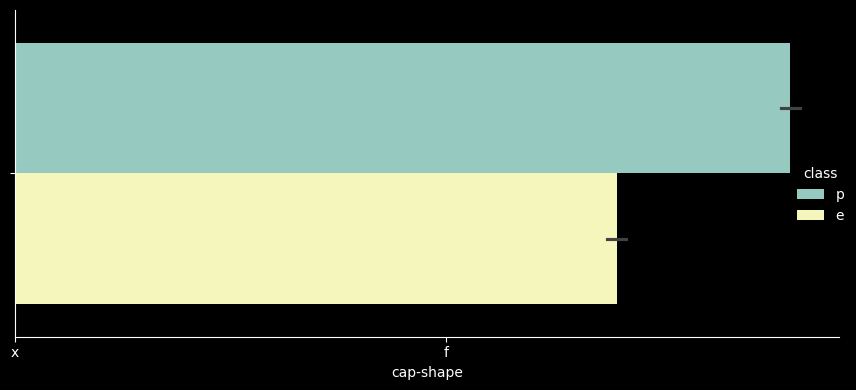

<Figure size 1000x400 with 0 Axes>

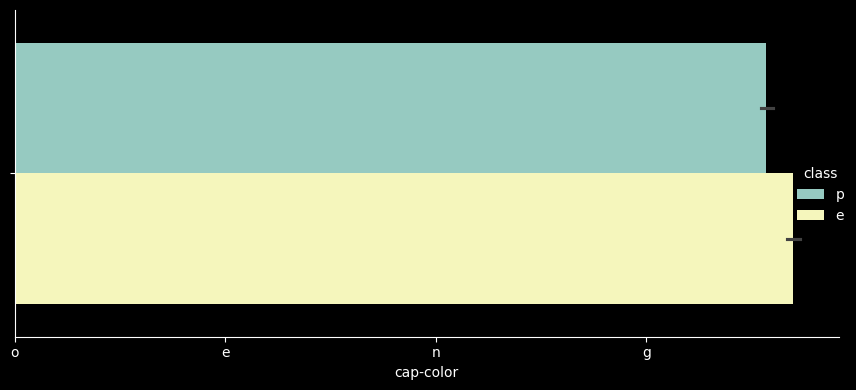

<Figure size 1000x400 with 0 Axes>

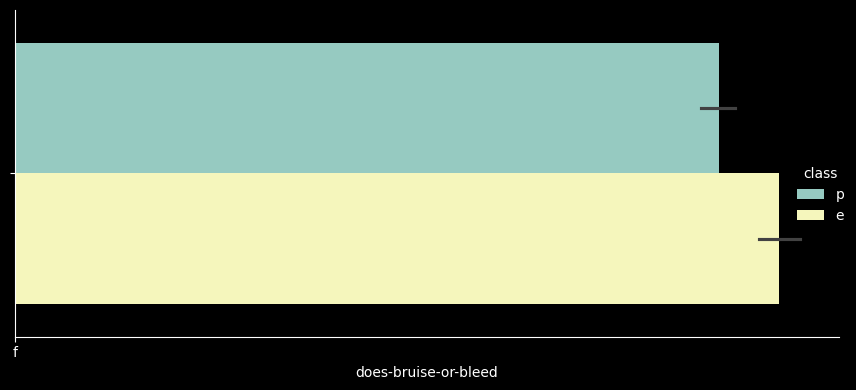

<Figure size 1000x400 with 0 Axes>

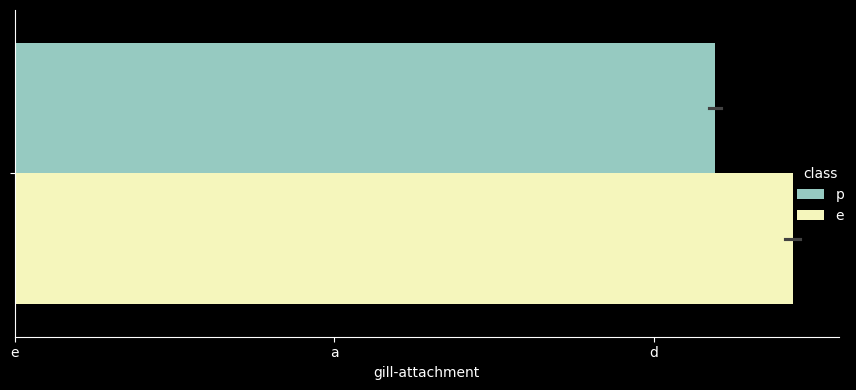

<Figure size 1000x400 with 0 Axes>

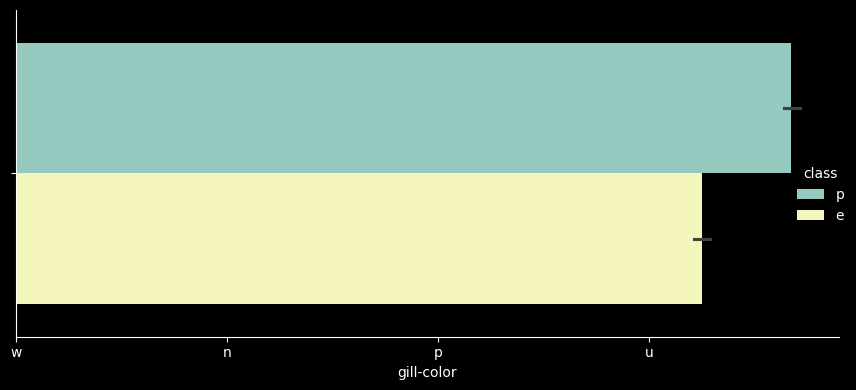

<Figure size 1000x400 with 0 Axes>

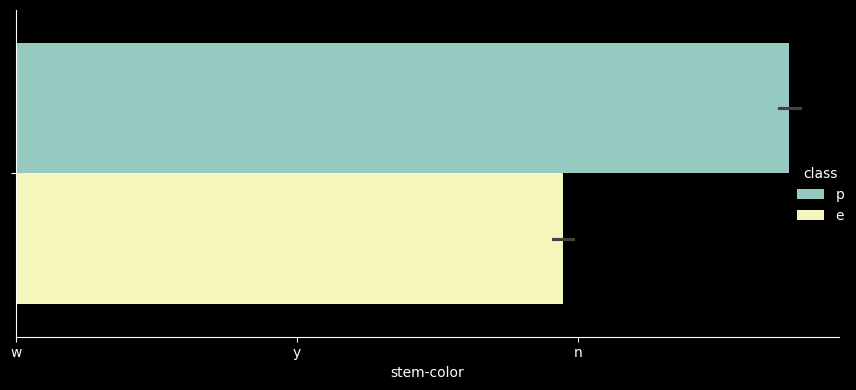

<Figure size 1000x400 with 0 Axes>

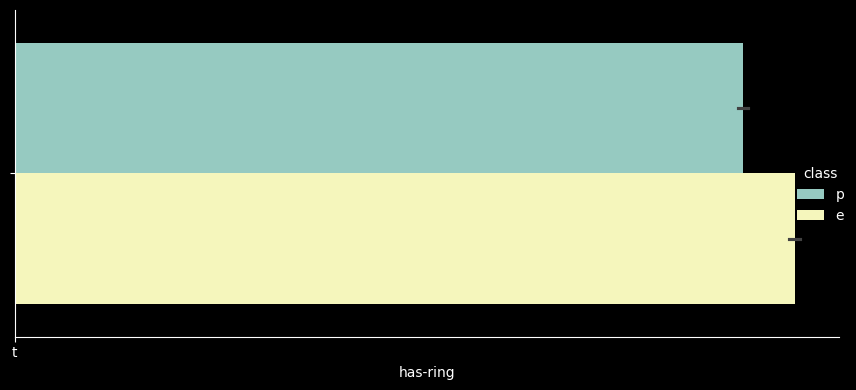

<Figure size 1000x400 with 0 Axes>

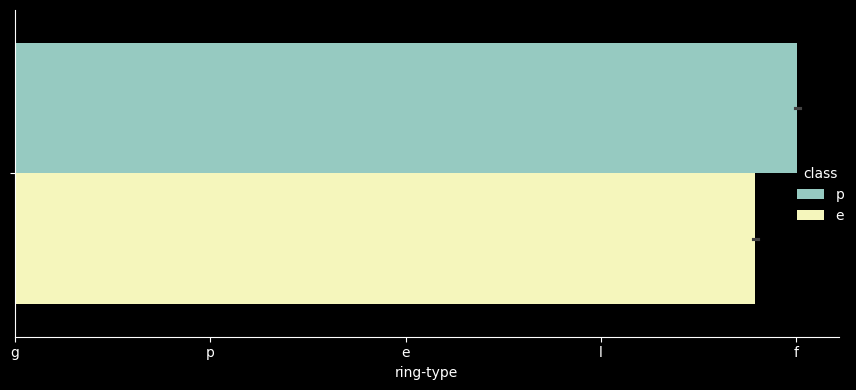

<Figure size 1000x400 with 0 Axes>

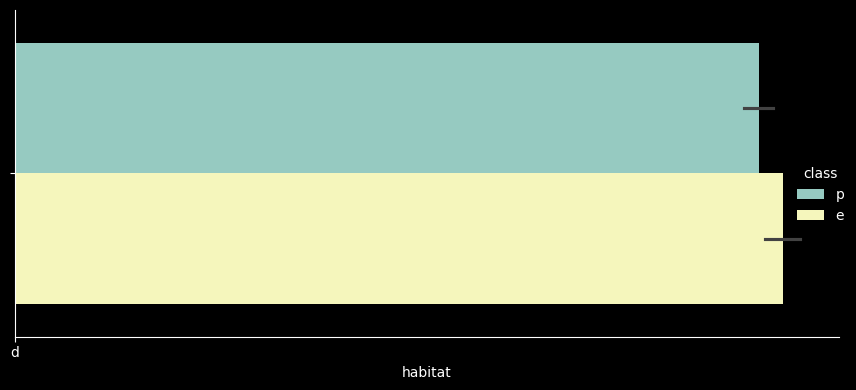

<Figure size 1000x400 with 0 Axes>

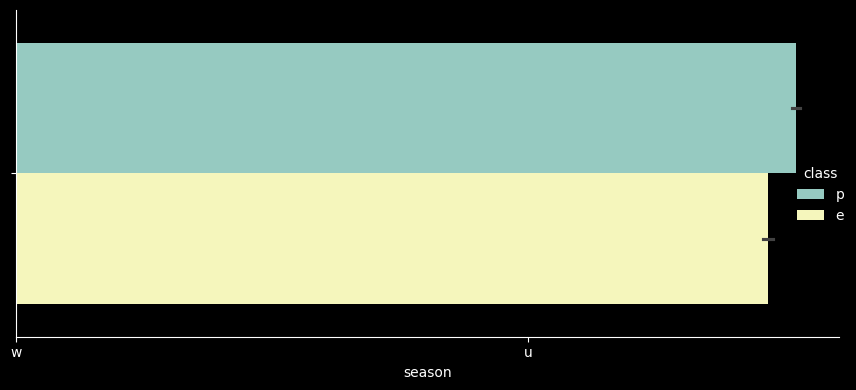

In [31]:
# bar plot for categorical features
for column in X_cat.columns:
    plt.figure(figsize=(10, 4))
    sns.catplot(data=X_cat, x=column, hue=y['class'], kind='bar', height=4, aspect=2)
    plt.tight_layout()
    plt.show()

# now logging the changes



In [32]:
X_num.to_csv('../data/final_numerical_features.csv', index=False)
X_cat.to_csv('../data/final_categorical_features.csv', index=False)
y.to_csv('../data/final_targets.csv', index=False)